In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Polynomial regression as linear least squares

From the knowledge of a sample of pair of scalar values $\{a_i, y_i\}_{i=1}^n$, we would like to predict the relation between $x$ and $y$. One simple way to go beyond linear regression is to consider polynomial regression: for example we could try to model $y$ as a polynomial of degree 3 of $a$. We would look for $(x_0, x_1, x_2, x_3) \in \mathbb{R}^4$ such that the values $a_i$ and $y_i$ are linked as $y_i \simeq x_0 + x_1 a_i + x_2 a_i^2$.

This problem can be mapped to linear regression by considering that we have for each $a$ a feature vectors of dimension $d + 1$ when considering the fit of a polynomial of degree $d$. This feature vector is $(1, a, a^2, \cdots, a^d)$. Such that the full data matrix is
$$
    A = \left[\begin{matrix}
    1 & a_1 & \cdots & a_1^d \\
    1 & a_2 & \cdots & a_2^d \\ 
    \vdots & \vdots & \vdots & \vdots \\
    1 & a_n & \cdots & a_n^d
\end{matrix} \right] \in \mathbb{R}^{n \times (d+1)}.
$$

As a exercise below we will consider data that was created from a polynomial of dimension 3, to which noise is added. Assuming that we do not know the degree of the generated polynomial, we will try to fit with $d = 5$ and $d=2$ and investigate ridge regression.  

In [2]:
## Helper functions to setup the problem
def get_data_mat(a, deg):
    """
    Inputs:
    a: (np.array of size N)
    deg: (int) max degree used to generate the data matrix
    
    Returns:
    A: (np.array of size N x (deg_true + 1)) data matrix
    """
    A = np.array([a ** i for i in range(deg + 1)]).T
    return A

def draw_sample(deg_true, x, N, eps=0):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    eps: noise level
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    a = np.sort(np.random.rand(N))
    A = get_data_mat(a, deg_true)
    y = A @ x + eps * np.random.randn(N)
    return a, y


**(a)** Complete the three functions below to obtain 
- the least square estimator $x^{LS}$
- the ridge estimator $x^{Ridge}$
- the mean square error $\lVert A x - y \rVert^2 / n$

In [3]:
def least_square_estimator(A, y):
    # multiples more penrose psudo inverse times y and returns the vector result. 
    return np.dot(np.linalg.pinv(A),y.T)


def ridge_estimator(A, y, lbd):
    #applies ridge regression esimtator
    temp=(A.T@A+lbd*np.identity(len(A[1])))
    return np.linalg.inv(temp)@A.T@y



def mean_squared_error(x, A, y):
    ## x here are our learned weights. 
    #return ((A@x-y).T@(A@x-y))/len(A[1])
    return ((A@x - y)**2).mean(axis=0)
    #return np.square(np.linalg.norm(A@x-y))/A.shape[0]

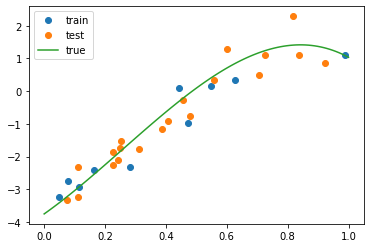

In [26]:
# This cells generates the data - for your submission do not change it. 
# But for your own curiosity, do not hesistate to investigate what is going on when changing the properties of the data :) 

np.random.seed(45) # fixing seed so everyone should see the same data
N = 10
deg_true = 3 # degree of true polynomial
eps = 0.5 # noise amplitude
x_true = np.array([-3.75307359,  6.58178662,  6.23070014, -8.02457871])

# radom input data
a_tr, y_tr = draw_sample(deg_true, x_true, N, eps=eps) # training data
a_te, y_te = draw_sample(deg_true, x_true, 2 * N, eps=eps) # testing data

a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.legend()

**(b)** Complete the code below to visualize the prediction of $x^{LS}$ and $x^{Ridge}$ for $\lambda$ in $[1e-7, 0.1, 1]$, using in all cases a prediction model of degree 5. The output of the cell should be a plot as above, where you added three lines of predictions for all values of $a \in [0,1]$: line LS, line ridge $\lambda = 1e-7$, line ridge $\lambda = 0.1$, line ridge $\lambda = 1$.

In [28]:

x_ls =least_square_estimator(A_tr,y_tr)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
ax1.plot(a_plot, A_plot @ x_ls, label='LS')
def plot_for_lambdas(lbss):
    for lbs in lbss:
        fig1, ax1 = plt.subplots()
        a_plot = np.linspace(0, 1, 100)
        A_plot = get_data_mat(a_plot, deg_true)
        ax1.plot(a_tr, y_tr,'o', label='train')
        ax1.plot(a_te, y_te,'o', label='test')
        ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
        ax1.plot(a_plot, A_plot @ x_ls, label='LS')
        x_ridge=ridge_estimator(A_tr, y_tr, lbs)
        ax1.plot(a_plot, A_plot @ x_ridge, label='ridge')
        plt.title("ridge with $\lambda$={}".format(lbs))
        ax1.legend()
#plot_for_lambdas([1e-7, 0.1, 1])        

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 4)

**(c)** Use the `mean_squared_error` to make a plot of the training error and the test error as a function of $\lambda$ as we have seen in the lecture (range given below). Which value of $\lambda$ would you choose? Does that align with your intuition from the plots above?

In [6]:

def compare_ridges(A_tr, A_te, y_tr,y_te,min_lambda, max_lambda):
    lambdas=np.logspace(min_lambda,max_lambda, 10)
    training_errors=[]
    testing_errors=[]
    for lbd in lambdas:
        x_train=ridge_estimator(A_tr, y_tr, lbd)
        x_test=ridge_estimator(A_te, y_te, lbd)
        training_errors.append(mean_squared_error(x_train, A_tr,y_tr))
        testing_errors.append(mean_squared_error(x_test, A_te,y_te))
    fig1, ax1 = plt.subplots()
    plt.plot(lambdas, training_errors, '-+', label='train')
    plt.plot(lambdas, testing_errors,'-+', label='test')
    plt.xscale('log')
    plt.title("Training and testing error as a function of $\lambda$")
    ax1.legend()
compare_ridges(A_tr, A_te, y_tr,y_te, -6, -1)

NameError: name 'A_tr' is not defined

In [7]:
tr_mse = []
te_mse = []
lbds = np.logspace(-6, -1, 10)
for lbd in lbds:
    x_train=ridge_estimator(A_tr, y_tr, lbd)
    x_test=ridge_estimator(A_te, y_te, lbd)
    tr_mse.append(mean_squared_error(x_train, A_tr,y_tr))
    te_mse.append(mean_squared_error(x_test, A_te,y_te))

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()

NameError: name 'A_tr' is not defined

- assuming i did not mess up somewhere, i would chose as small a  $\lambda$ value as possible as it seems that both trianing and tesitng mse are increasing as a funciton of $\lambda$ in this caes

**(d)** For the optimal value of $\lambda$ compare $x^{LS}$, $x^{Ridge}$ and $x^{true}$.   


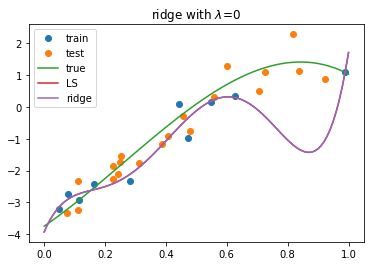

In [ ]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 5
A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)
x_ls =least_square_estimator(A_tr,y_tr)
A_plot = get_data_mat(a_plot, deg_pred)
ax1.plot(a_plot, A_plot @ x_ls, label='LS')
x_ridge=ridge_estimator(A_tr, y_tr, 0)
ax1.plot(a_plot, A_plot @ x_ridge, label='ridge')
plt.title("ridge with $\lambda$={}".format(0))
ax1.legend()

(e) Repeat the same operation with a fitting model of degree 2 (`deg_pred=2`). What are your findings related to the optimal degree of regularizations in this case? 

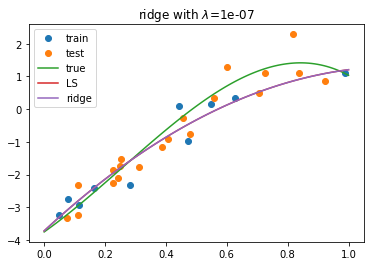

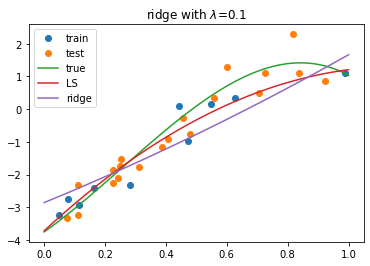

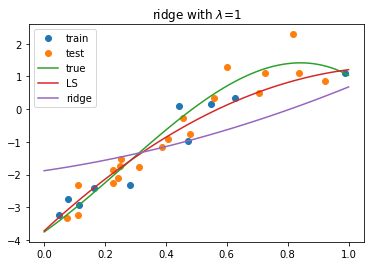

In [ ]:
def plot_for_lambdas(lbss):
    for lbs in lbss:
        fig1, ax1 = plt.subplots()
        a_plot = np.linspace(0, 1, 100)
        A_plot = get_data_mat(a_plot, deg_true)
        ax1.plot(a_tr, y_tr,'o', label='train')
        ax1.plot(a_te, y_te,'o', label='test')
        ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
        deg_pred = 2
        A_tr = get_data_mat(a_tr, deg_pred)
        A_te = get_data_mat(a_te, deg_pred)
        x_ls =least_square_estimator(A_tr,y_tr)
        A_plot = get_data_mat(a_plot, deg_pred)
        ax1.plot(a_plot, A_plot @ x_ls, label='LS')
        x_ridge=ridge_estimator(A_tr, y_tr, lbs)
        ax1.plot(a_plot, A_plot @ x_ridge, label='ridge')
        plt.title("ridge with $\lambda$={}".format(lbs))
        ax1.legend()
plot_for_lambdas([1e-7, 0.1, 1])        

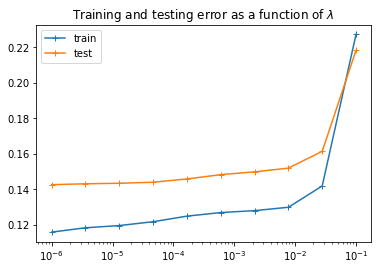

In [ ]:
def compare_ridges(A_tr, A_te, y_tr,y_te,min_lambda, max_lambda):
    lambdas=np.logspace(min_lambda,max_lambda, 10)
    training_errors=[]
    testing_errors=[]
    for lbd in lambdas:
        x_train=ridge_estimator(A_tr, y_tr, lbd)
        x_test=ridge_estimator(A_te, y_te, lbd)
        training_errors.append(mean_squared_error(x_train, A_tr,y_tr))
        testing_errors.append(mean_squared_error(x_test, A_te,y_te))
    fig1, ax1 = plt.subplots()
    plt.plot(lambdas, training_errors, '-+', label='train')
    plt.plot(lambdas, testing_errors,'-+', label='test')
    plt.xscale('log')
    plt.title("Training and testing error as a function of $\lambda$")
    ax1.legend()
compare_ridges(A_tr, A_te, y_tr,y_te, -6, -1)

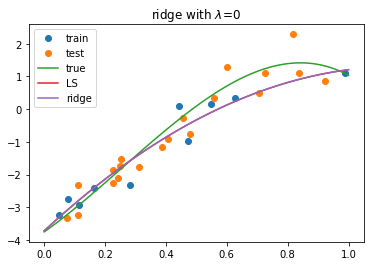

In [ ]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 2
A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)
x_ls =least_square_estimator(A_tr,y_tr)
A_plot = get_data_mat(a_plot, deg_pred)
ax1.plot(a_plot, A_plot @ x_ls, label='LS')
x_ridge=ridge_estimator(A_tr, y_tr, 0)
ax1.plot(a_plot, A_plot @ x_ridge, label='ridge')
plt.title("ridge with $\lambda$={}".format(0))
ax1.legend()